# Pengolahan Data Klorofil

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

np.warnings.filterwarnings('ignore') # for ignoring the warnings

In [4]:
#Memanggil data klorofil
ds_chl=xr.open_dataset('chlorophyll_java_sea.nc', chunks={'time':1})
ds_chl

<xarray.Dataset>
Dimensions:      (time: 168, latitude: 175, longitude: 205)
Coordinates:
  * time         (time) datetime64[ns] 2003-01-16 2003-02-16 ... 2016-12-16
  * latitude     (latitude) float64 0.9792 0.9219 0.8647 ... -8.922 -8.979
  * longitude    (longitude) float64 101.0 101.1 101.2 ... 116.8 116.9 117.0
Data variables:
    chlorophyll  (time, latitude, longitude) float32 dask.array<chunksize=(1, 175, 205), meta=np.ndarray>
Attributes: (12/51)
    _lastModified:                     2021-01-18T01:49:10.000Z
    cdm_data_type:                     Grid
    Conventions:                       CF-1.6, COARDS, ACDD-1.3
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    creator_name:                      NASA/GSFC/OBPG
    creator_type:                      group
    ...                                ...
    temporal_range:                    month
    testOutOfDate:                     now-70days
    time_coverage_end:                 2020-12-16T00:00:00Z
    time_coverage_start:               2003-01-16T00:00:00Z
    title:                             Chlorophyll-a, Aqua MODIS, NPP, L3SMI,...
    Westernmost_Easting:               79.97917

### Melihat detail data klorofil

In [5]:
ds_chl.chlorophyll.attrs

{'colorBarMaximum': 30.0,
 'colorBarMinimum': 0.03,
 'colorBarScale': 'Log',
 'ioos_category': 'Ocean Color',
 'long_name': 'Mean Chlorophyll a Concentration',
 'references': 'Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans: A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.',
 'standard_name': 'concentration_of_chlorophyll_in_sea_water',
 'units': 'mg m-3',
 'valid_max': 100.0,
 'valid_min': 0.001}

In [6]:
#Melihat referensi untuk pengolahan data klorofil
ds_chl.chlorophyll.attrs['references']

'Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans: A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.'

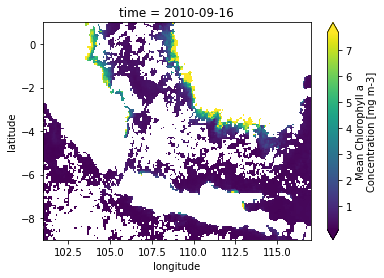

In [13]:
#Memilih data september 2010 menggunakan .sel()
ds_chl.sel(time='2010-09-16').chlorophyll.plot(robust=True)

### Membuat versi yang lebih bagus untuk article

Text(0.5, 1.0, 'Chlorophyll Distribution in September 2010')

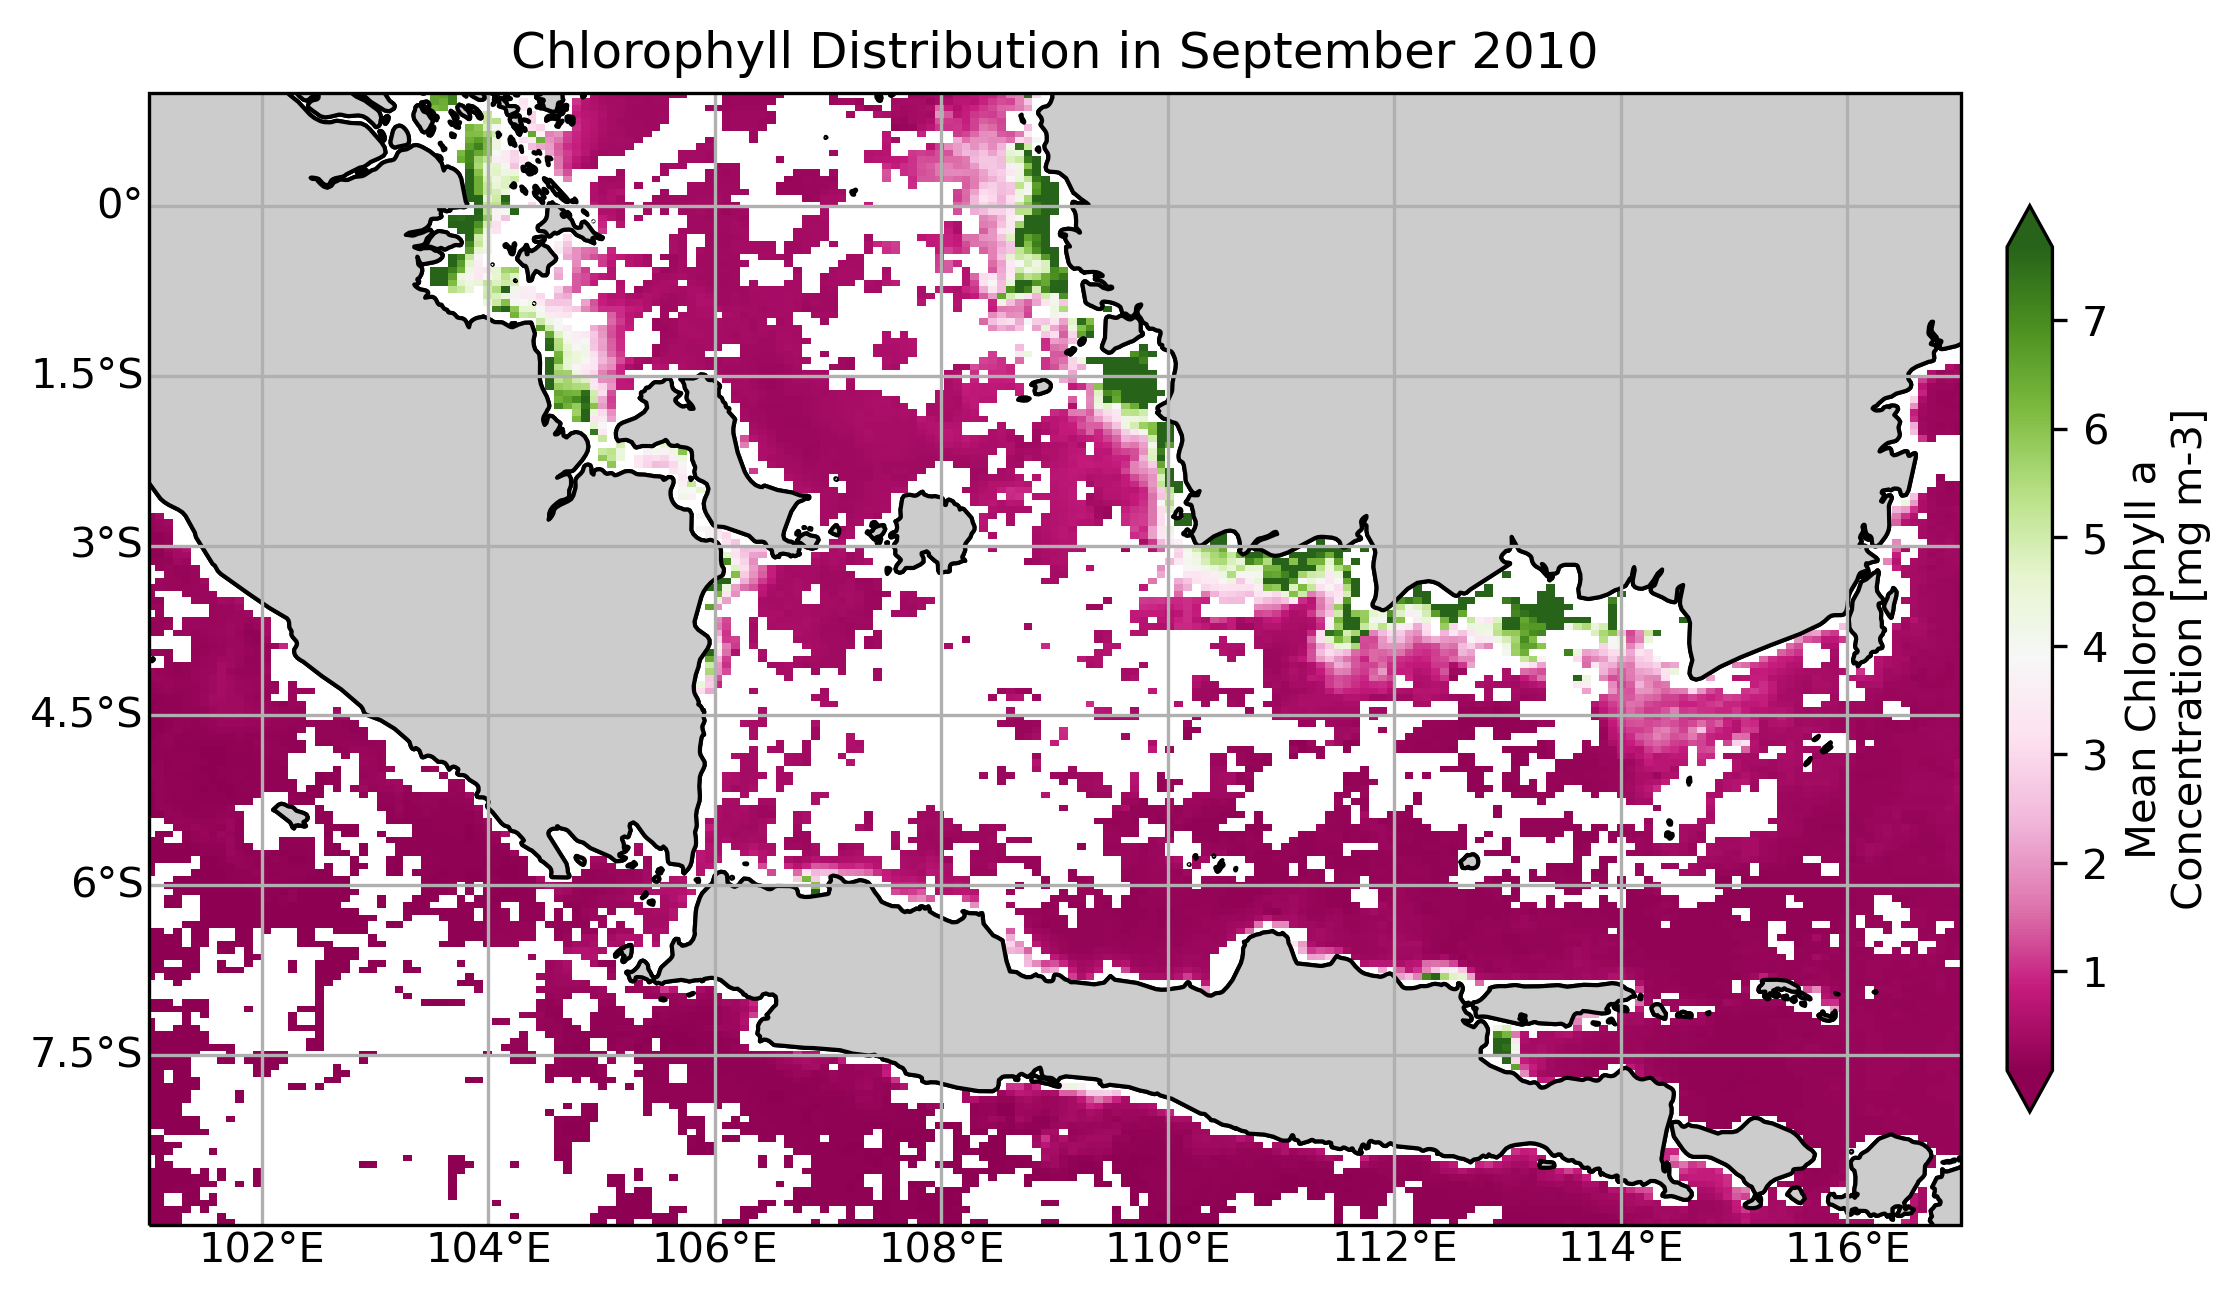

In [14]:
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, 
                       dpi=300,
                       figsize=[10,5])

region=[101,117,-9,1]
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False
ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
ax.set_extent(region)

ds_chl.sel(time='2010-09-16').chlorophyll.plot(cmap='PiYG',
                                               robust=True, 
                                               cbar_kwargs={'shrink':0.8,
                                                            'pad':0.02})

ax.set_title('Chlorophyll Distribution in September 2010')

### Analisis yang sama untuk selatan Kalimantan

In [19]:
south_kalimantan_chl=ds_chl.sel(latitude=slice(-3,-5), longitude=slice(110, 116)).chlorophyll
south_kalimantan_chl

<xarray.DataArray 'chlorophyll' (time: 168, latitude: 35, longitude: 77)>
dask.array<getitem, shape=(168, 35, 77), dtype=float32, chunksize=(1, 35, 77), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2003-01-16 2003-02-16 ... 2016-12-16
  * latitude   (latitude) float64 -3.027 -3.084 -3.142 ... -4.858 -4.916 -4.973
  * longitude  (longitude) float64 110.0 110.1 110.2 110.3 ... 115.8 115.9 116.0
Attributes:
    colorBarMaximum:  30.0
    colorBarMinimum:  0.03
    colorBarScale:    Log
    ioos_category:    Ocean Color
    long_name:        Mean Chlorophyll a Concentration
    references:       Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a a...
    standard_name:    concentration_of_chlorophyll_in_sea_water
    units:            mg m-3
    valid_max:        100.0
    valid_min:        0.001

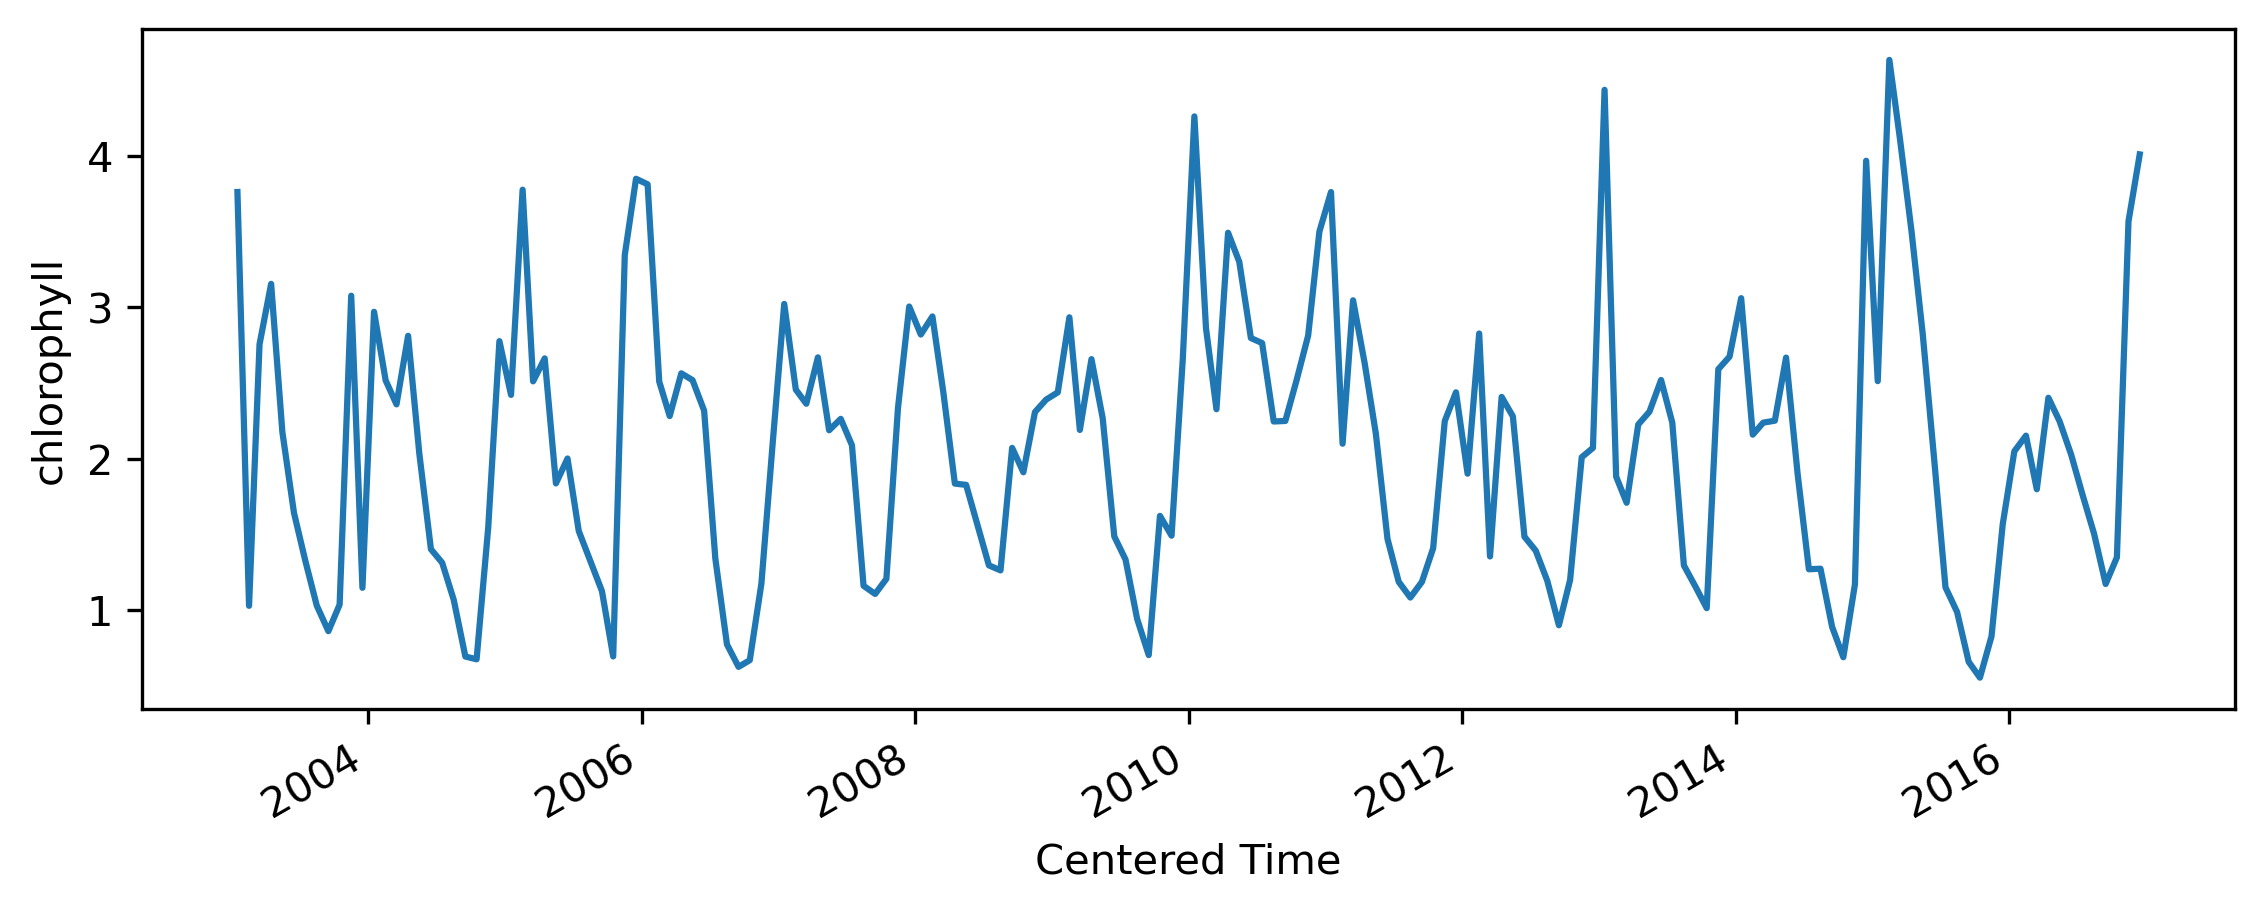

In [20]:
plt.figure(figsize=[9,3], dpi=300)

south_kalimantan_chl.mean(['longitude', 'latitude']).plot()

### Klorofil seasonal

In [21]:
clim_season_chl = ds_chl.groupby('time.season').mean().chlorophyll
clim_season_chl

<xarray.DataArray 'chlorophyll' (season: 4, latitude: 175, longitude: 205)>
dask.array<concatenate, shape=(4, 175, 205), dtype=float32, chunksize=(1, 175, 205), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 0.9792 0.9219 0.8647 ... -8.865 -8.922 -8.979
  * longitude  (longitude) float64 101.0 101.1 101.2 101.3 ... 116.8 116.9 117.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

Wall time: 627 ms


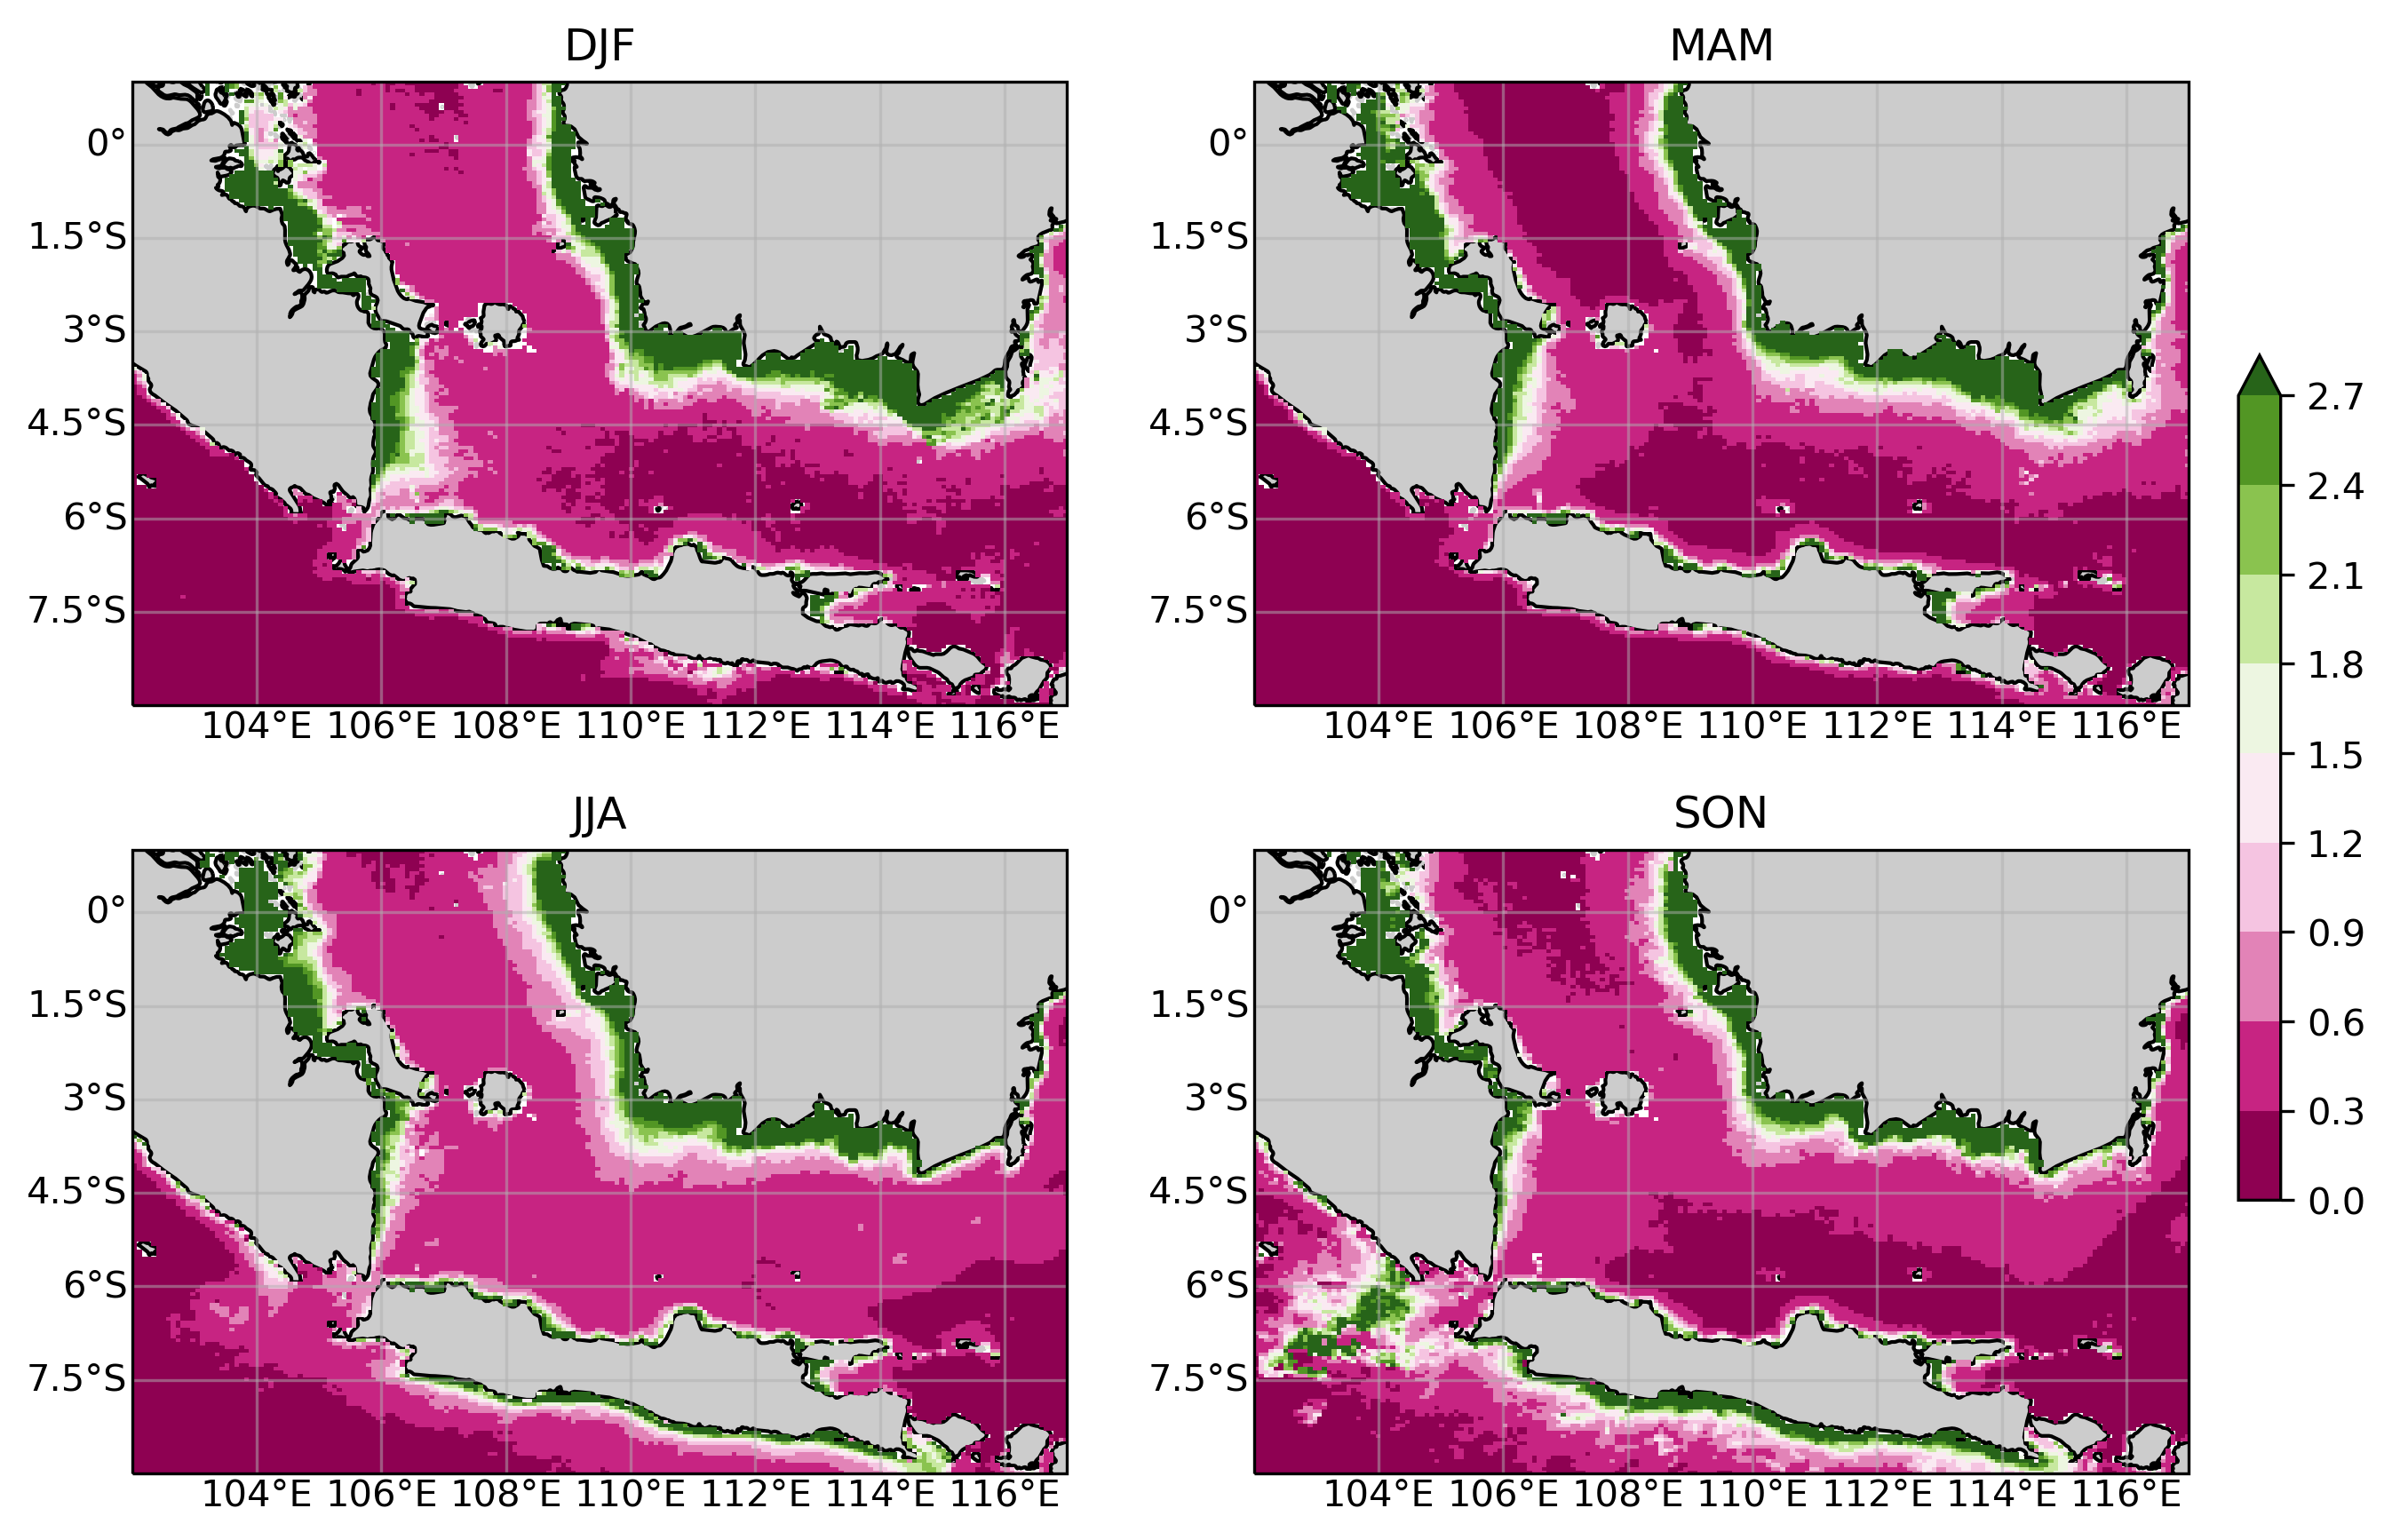

In [24]:
%%time

fig, axes = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},
                         ncols=2, nrows=2, 
                         dpi=300, figsize=[12,7])

axes_flatted = axes.flat
extent=[102,117,-9,1]
season_order = ['DJF', 'MAM', 'JJA', 'SON']

for i in range(len(clim_season_chl.season)):
    axes_flatted[i].coastlines()
    axes_flatted[i].set_extent(extent)
    axes_flatted[i].add_feature(cfeature.LAND, facecolor='0.8')
    gl=axes_flatted[i].gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels=False
    gl.right_labels=False
    
    im=clim_season_chl.sel(season=season_order[i]).plot(ax=axes_flatted[i],
                                           levels=np.arange(0,2.700001,0.3), 
                                           extend='max', add_colorbar=False,
                                          cmap='PiYG')
    
    axes_flatted[i].set_title(season_order[i])

cbar =  fig.colorbar(im, ax=axes, extend='max', shrink=0.6, pad=0.02)

### Combine data klorofil dengan data angin

In [34]:
ds_wind=xr.open_dataset('wind_java_sea.nc',
                    chunks={'time':1})

wind_speed=(ds_wind.u10**2 + ds_wind.v10**2)**0.5

ds_wind['wind_speed'] = wind_speed

ds_wind

south_kalimantan_wind = ds_wind.sel(latitude=slice(-3,-5), longitude=slice(110, 116))
south_kalimantan_wind

seasonal_wind = ds_wind.groupby('time.season').mean('time')
seasonal_wind

<xarray.Dataset>
Dimensions:     (longitude: 65, latitude: 41, season: 4)
Coordinates:
  * longitude   (longitude) float32 101.0 101.2 101.5 ... 116.5 116.8 117.0
  * latitude    (latitude) float32 1.0 0.75 0.5 0.25 ... -8.25 -8.5 -8.75 -9.0
  * season      (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    u10         (season, latitude, longitude) float32 dask.array<chunksize=(1, 41, 65), meta=np.ndarray>
    v10         (season, latitude, longitude) float32 dask.array<chunksize=(1, 41, 65), meta=np.ndarray>
    wind_speed  (season, latitude, longitude) float32 dask.array<chunksize=(1, 41, 65), meta=np.ndarray>

Wall time: 5.11 s


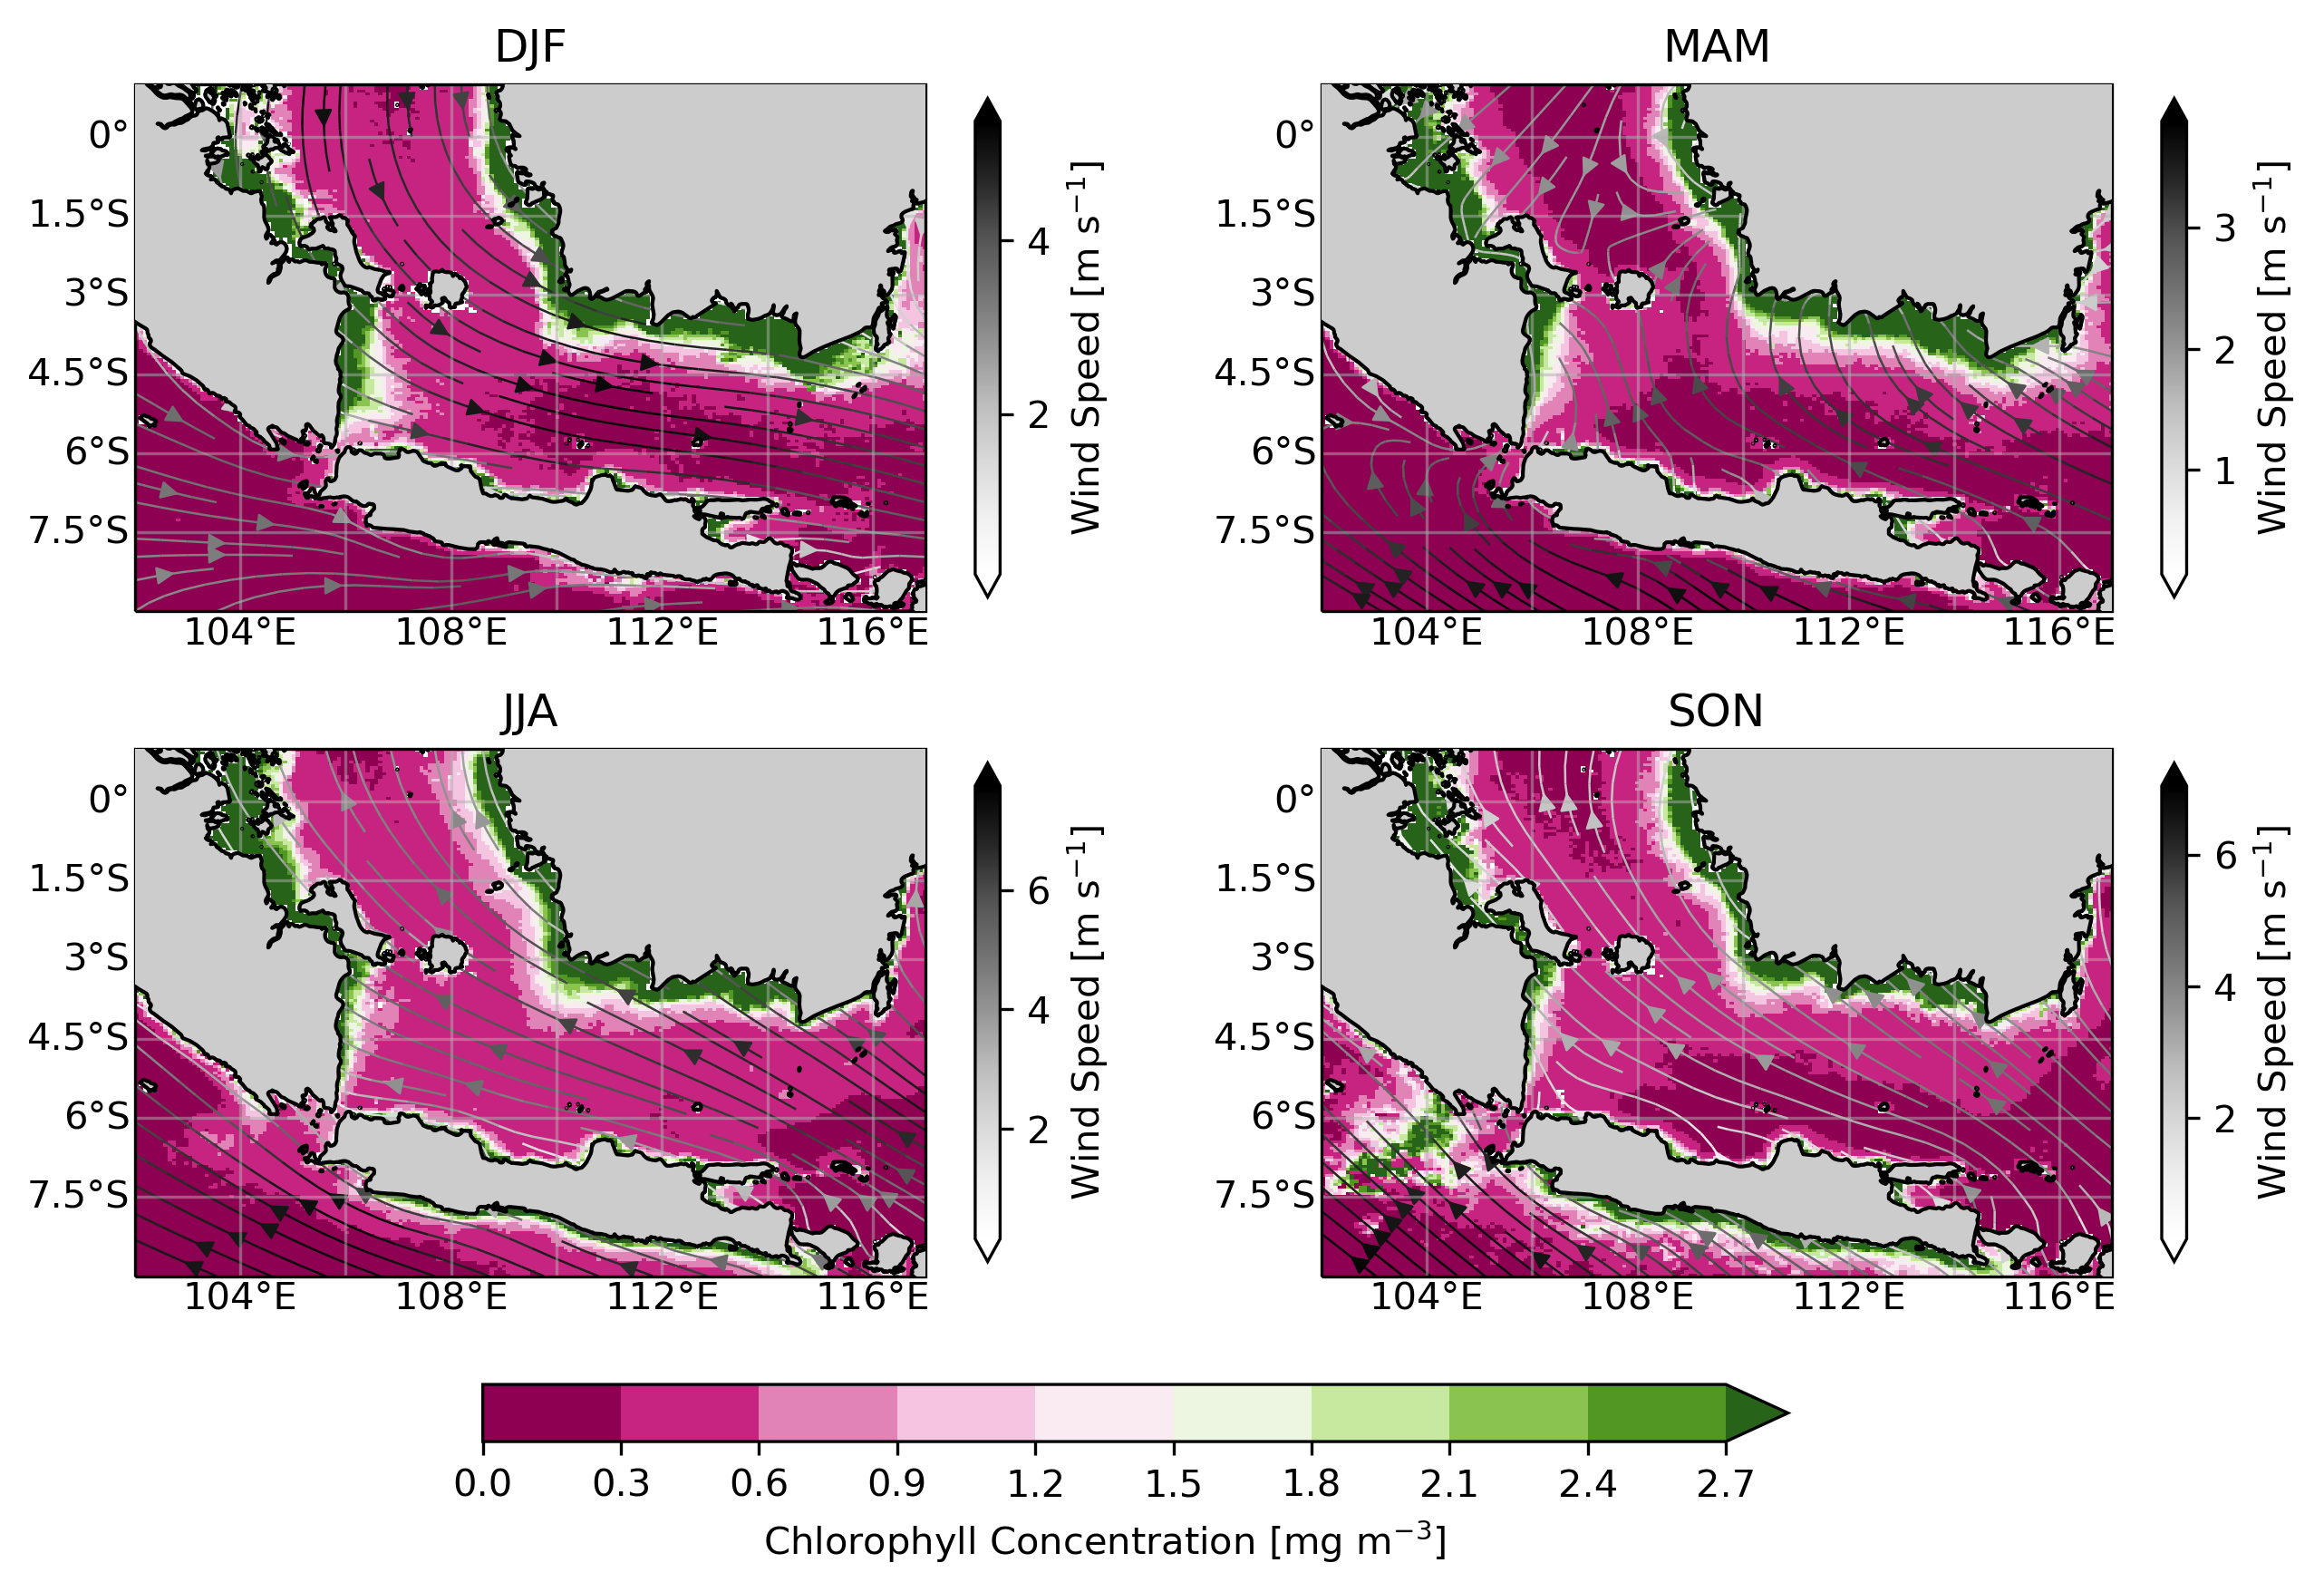

In [32]:
%%time

fig, axes = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},
                      ncols=2, nrows=2, dpi=300, figsize=[16,14])

axes_flatted = axes.flat
extent=[102,117,-9,1]
season_order = ['DJF', 'MAM', 'JJA', 'SON']
plt.subplots_adjust(left=0.5,right=1,bottom=0.68,top=1)

for i in range(len(clim_season_chl.season)):
    axes_flatted[i].coastlines()
    axes_flatted[i].set_extent(extent)
    axes_flatted[i].add_feature(cfeature.LAND, facecolor='0.8', zorder=5, edgecolor='k')
    gl=axes_flatted[i].gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels=False
    gl.right_labels=False
    
    im=clim_season_chl.sel(season=season_order[i]).plot(ax=axes_flatted[i],
                                           levels=np.arange(0,2.700001,0.3), 
                                           extend='max', add_colorbar=False,
                                          cmap='PiYG')
    
    strm=axes_flatted[i].streamplot(x=seasonal_wind.longitude, 
                                    y=seasonal_wind.latitude,
                                    u=seasonal_wind.sel(season=season_order[i]).u10.values,
                                    v=seasonal_wind.sel(season=season_order[i]).v10.values,
                                    color=seasonal_wind.sel(season=season_order[i]).wind_speed.values,
                                    cmap='Greys',
                                    density=1,
                                    linewidth=0.6)
    
    cbar_wind=fig.colorbar(strm.lines, ax=axes_flatted[i], extend='both', shrink=0.9)
    cbar_wind.set_label('Wind Speed [m s$^{-1}$]')
    axes_flatted[i].set_title(season_order[i])

cbaxes = fig.add_axes([0.58,0.64,0.3,0.015])
cbar =  fig.colorbar(im, ax=axes, cax=cbaxes, extend='max', orientation='horizontal') 
cbar.set_label('Chlorophyll Concentration [mg m$^{-3}$]')

### Korelasi antara klorofil dengan angin

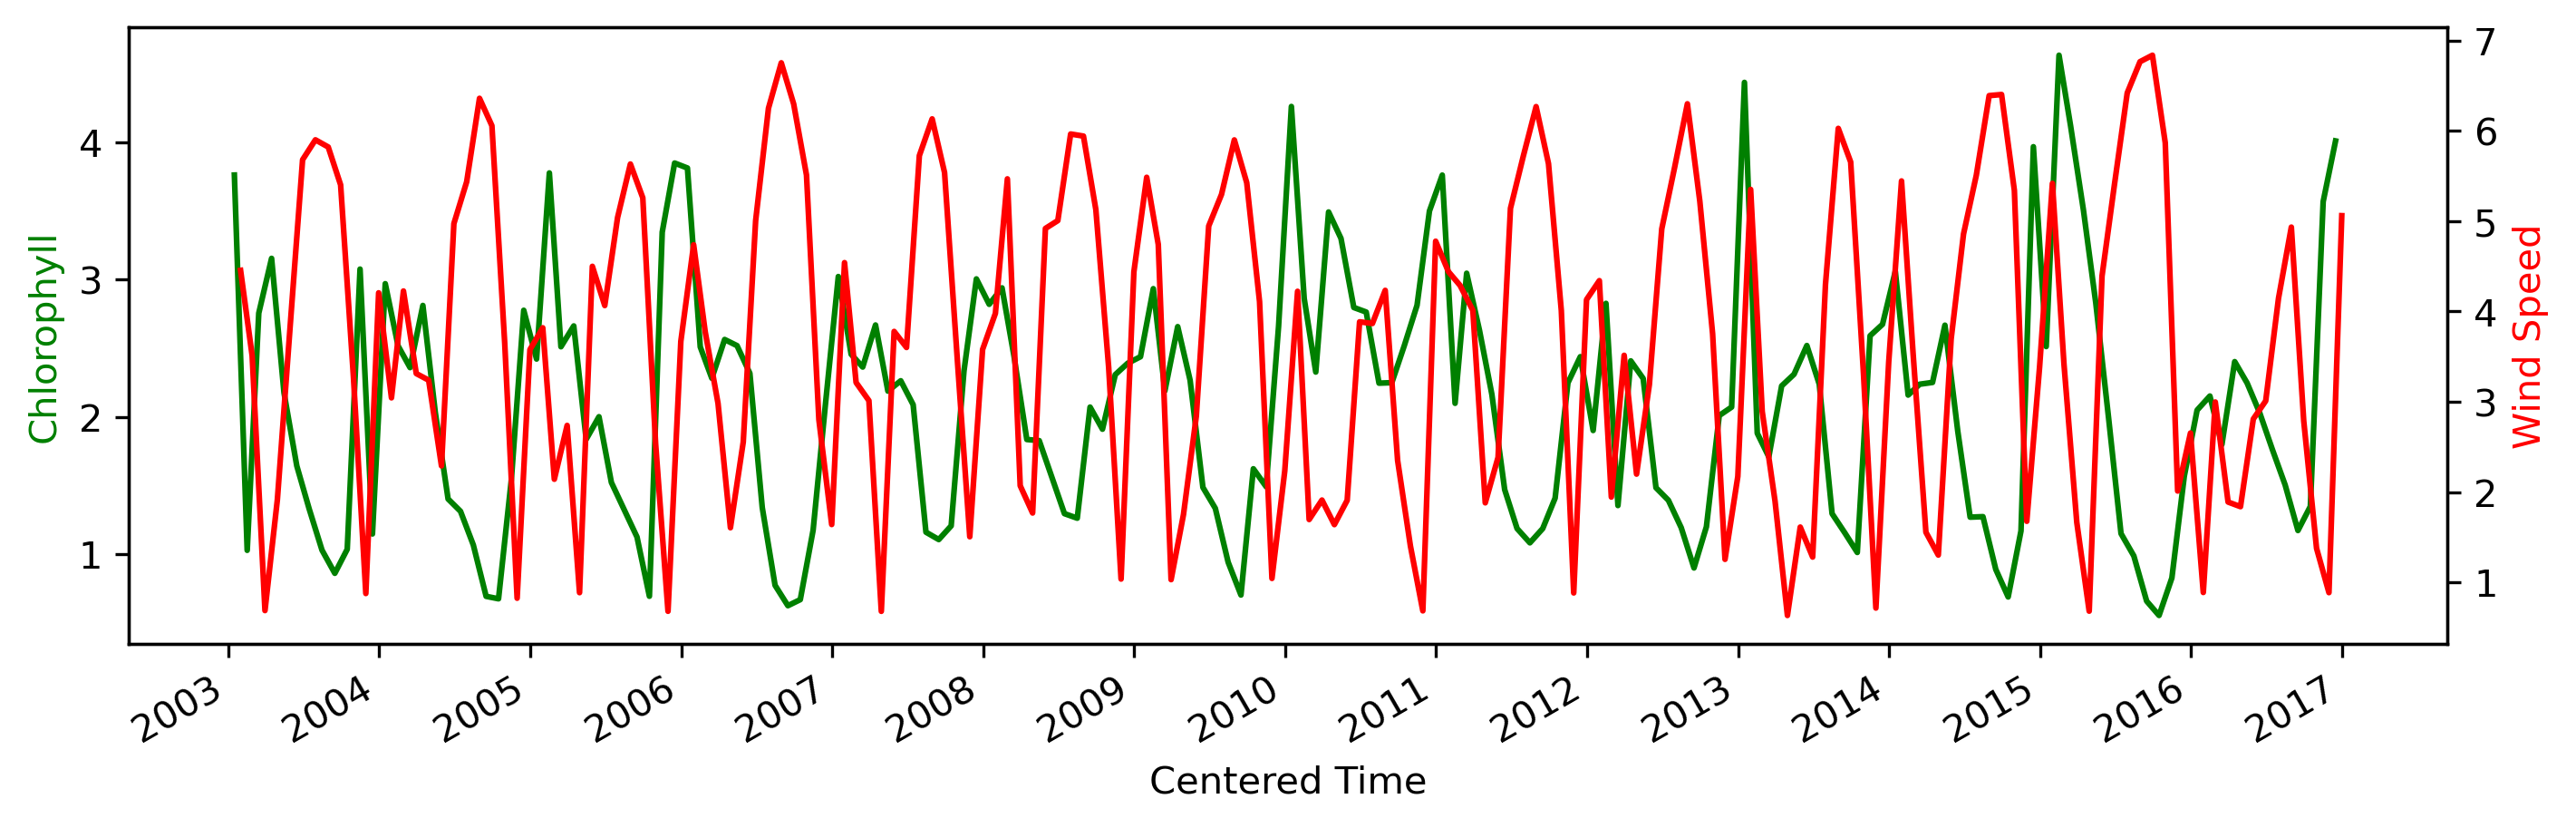

In [35]:
fig, ax = plt.subplots(dpi=300, figsize=[11,3])
south_kalimantan_chl.mean(['latitude', 'longitude']).plot(ax=ax, c='g')
ax.set_ylabel('Chlorophyll', color='g')

ax2 = ax.twinx()
south_kalimantan_wind.wind_speed.mean(['latitude', 'longitude']).plot(ax=ax2, c='r')
ax2.set_ylabel('Wind Speed', color='r')

for_xticks = pd.date_range('2003','2017',freq='YS')
ax.set_xticks(for_xticks)
ax.set_xticklabels([str(i)[:4] for i in for_xticks]);

In [37]:
from scipy import stats

In [38]:
R2, p2 = stats.pearsonr(south_kalimantan_chl.mean(['latitude', 'longitude']), 
                        south_kalimantan_wind.wind_speed.mean(['latitude', 'longitude']))

In [39]:
R2, p2

(-0.4180544634409417, 1.7150941916618372e-08)

Text(0.5, 1.0, 'Corr. of Wind Speed and Chlorophyll Concentration in South Kalimantan Sea')

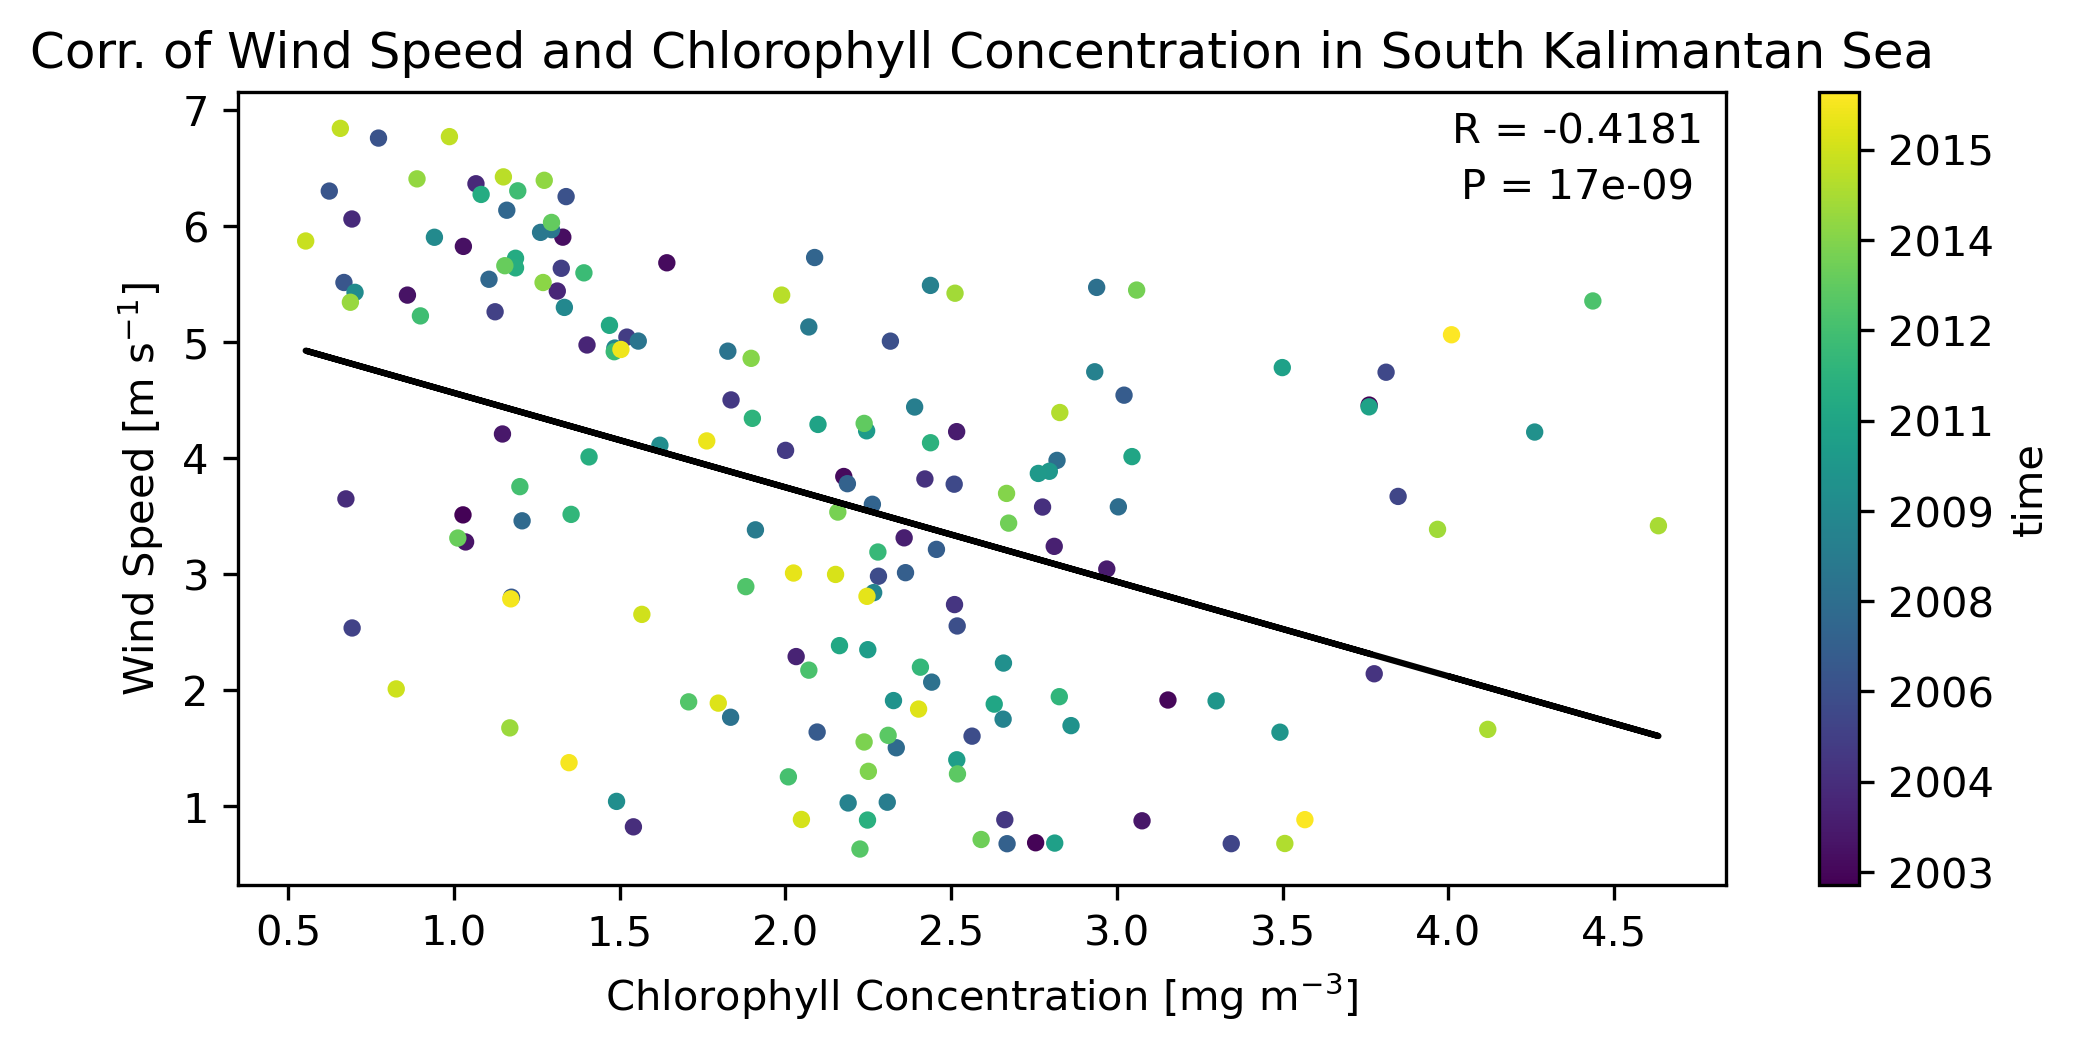

In [46]:
x = south_kalimantan_chl.mean(['latitude', 'longitude'])
y = south_kalimantan_wind.wind_speed.mean(['latitude', 'longitude'])

# for the trend line

polyfit = np.polyfit(x, y, 1) 
function = np.poly1d(polyfit)
new_y = function(x)

# plotting the scatter plot
    
fig,ax = plt.subplots(figsize=(8,3.5), dpi=300)
plot=ax.scatter(x, y, s=10, c=x.time)

ax.set_xlabel('Chlorophyll Concentration [mg m$^{-3}$]')
ax.set_ylabel('Wind Speed [m s$^{-1}$]')

# plotting the regression line
ax.plot(x, new_y, linestyle = '-', color = 'k') # cara sendiri

# Display R and p value:
plt.text(0.9, 0.95, f"R = {R2:.4f}", horizontalalignment='center',
     verticalalignment='center',
     transform=ax.transAxes)

plt.text(0.9, 0.88, f"P = 17e-09", horizontalalignment='center',
     verticalalignment='center',
     transform=ax.transAxes)

# Adding the colorbar
cbar = plt.colorbar(plot, label='time')
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y'))

# Adding the title
ax.set_title('Corr. of Wind Speed and Chlorophyll Concentration in South Kalimantan Sea')

### Korelasi antara klorofil dengan SST

In [41]:
ds_sst=xr.open_dataset('sst_java_sea.nc', chunks={'time':1})
ds_sst

monthly_clim_sst = ds_sst.groupby('time.month').mean().sst
season_sst = ds_sst.groupby('time.season').mean().sst

monthly_clim_sst

season_sst

south_kalimantan_sst=ds_sst.sel(lat=slice(-5, -3), lon=slice(110, 116)).sst
south_kalimantan_sst

<xarray.DataArray 'sst' (time: 168, lat: 8, lon: 24)>
dask.array<getitem, shape=(168, 8, 24), dtype=float32, chunksize=(1, 8, 24), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2003-01-31 2003-02-28 ... 2016-12-31
  * lat      (lat) float32 -4.875 -4.625 -4.375 -4.125 ... -3.625 -3.375 -3.125
  * lon      (lon) float32 110.1 110.4 110.6 110.9 ... 115.1 115.4 115.6 115.9

Text(0, 0.5, 'SST')

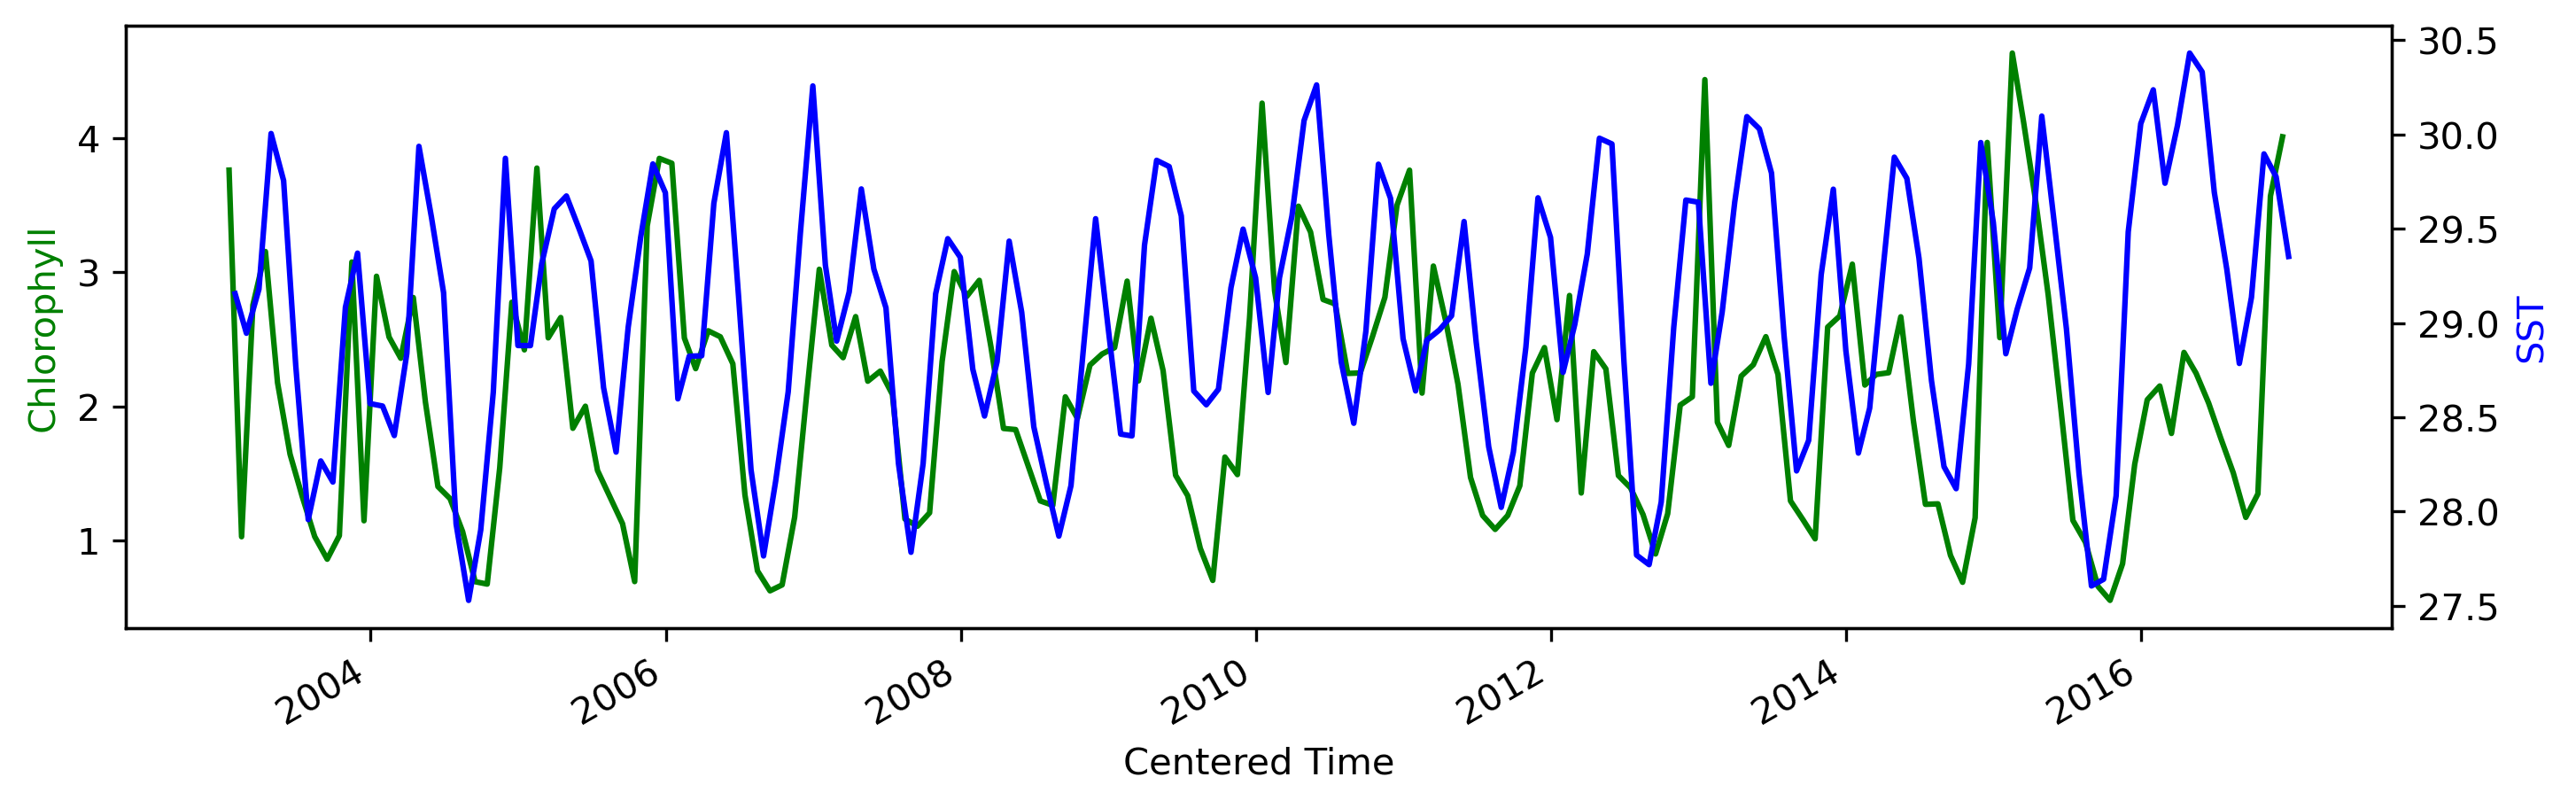

In [42]:
fig, ax = plt.subplots(dpi=300, figsize=[11,3])
south_kalimantan_chl.mean(['latitude', 'longitude']).plot(ax=ax, c='g')
ax.set_ylabel('Chlorophyll', color='g')

ax2 = ax.twinx()
south_kalimantan_sst.mean(['lat', 'lon']).plot(ax=ax2, c='b')
ax2.set_ylabel('SST', color='b')

In [43]:
R3, p3 = stats.pearsonr(south_kalimantan_chl.mean(['latitude', 'longitude']), 
                              south_kalimantan_sst.mean(['lat', 'lon']))

In [44]:
R3, p3

(0.41300587306713044, 2.6427042689846435e-08)

Text(0.5, 1.0, 'Corr. of SST and Chlorophyll Concentration in South Kalimantan Sea')

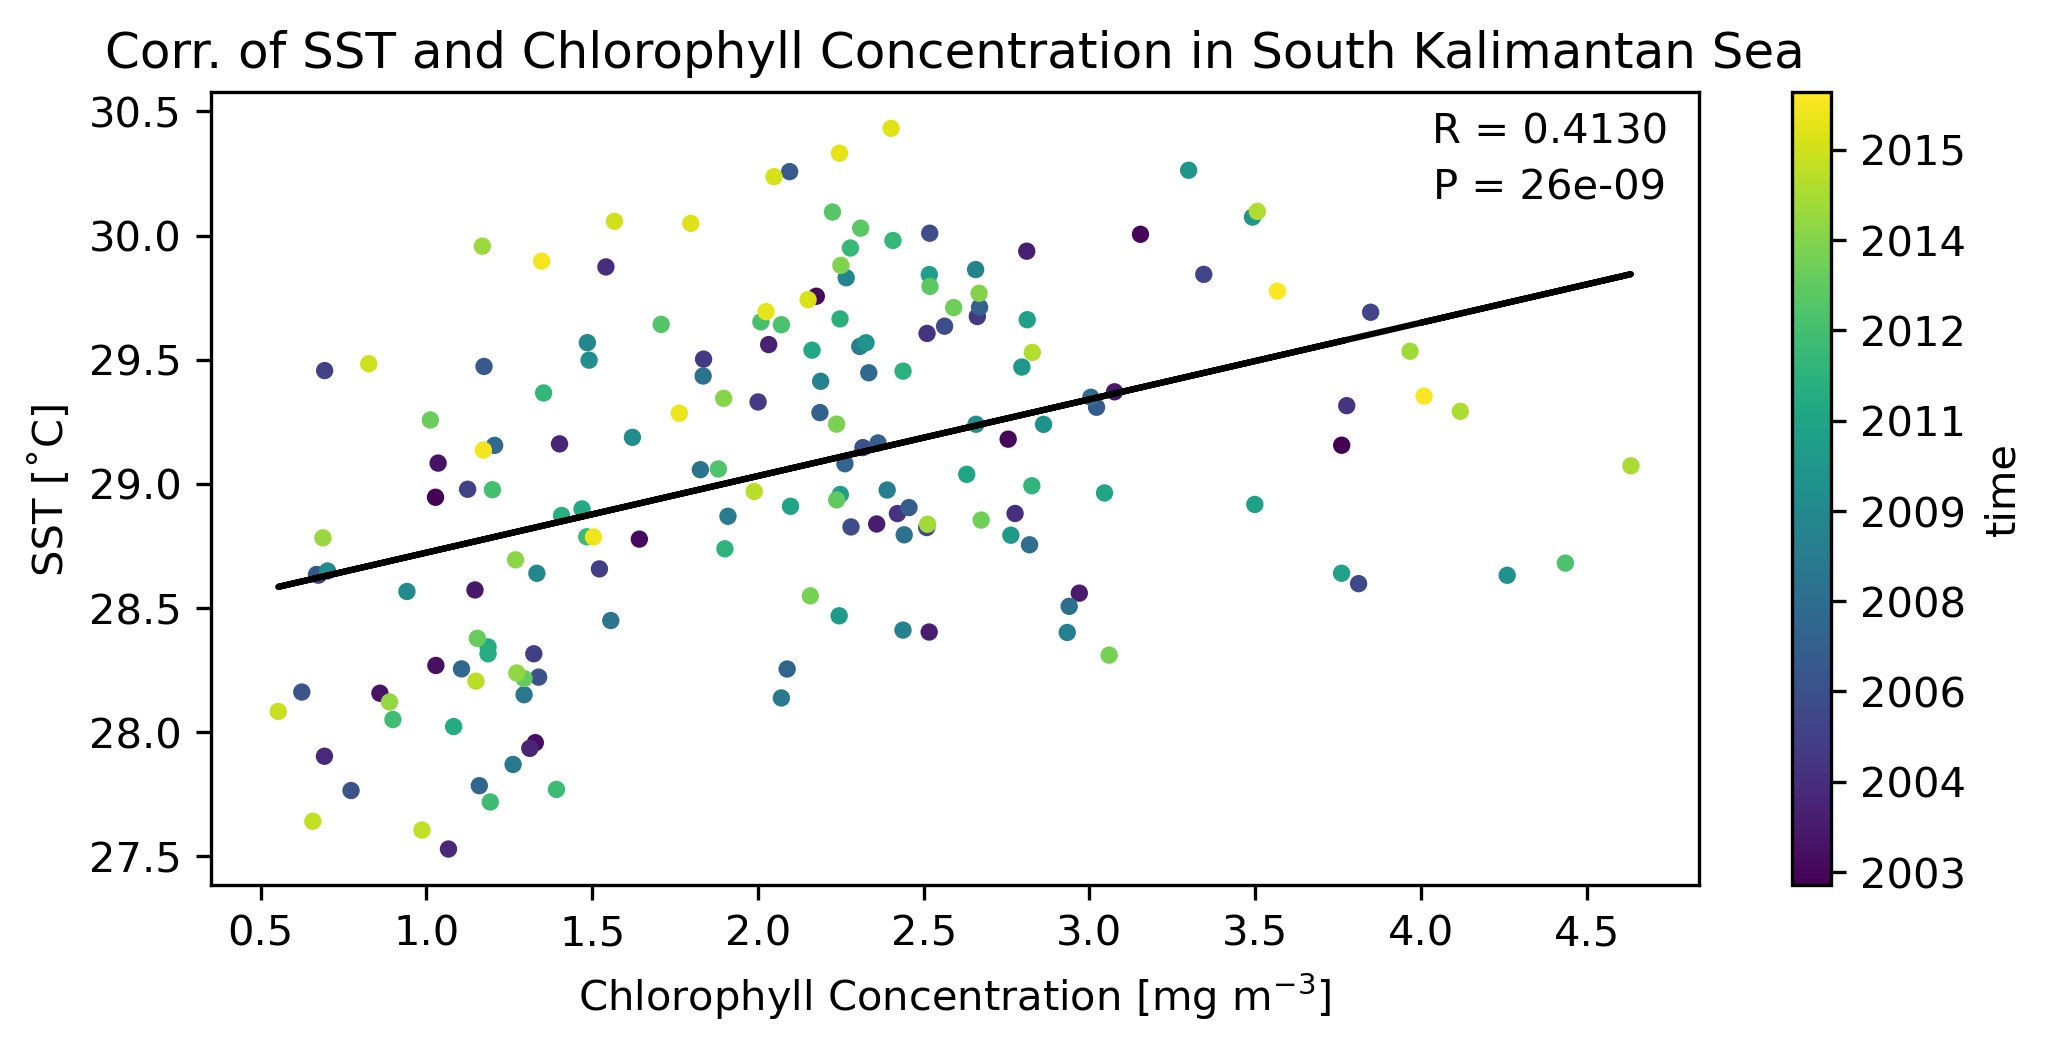

In [47]:
x = south_kalimantan_chl.mean(['latitude', 'longitude'])
y = south_kalimantan_sst.mean(['lat', 'lon'])

# for the trend line

polyfit = np.polyfit(x, y, 1) 
function = np.poly1d(polyfit)
new_y = function(x)

# plotting the scatter plot
    
fig,ax = plt.subplots(figsize=(8,3.5), dpi=300)
plot=ax.scatter(x, y, s=10, c=x.time)

ax.set_xlabel('Chlorophyll Concentration [mg m$^{-3}$]')
ax.set_ylabel('SST [˚C]')

# plotting the regression line
ax.plot(x, new_y, linestyle = '-', color = 'k') # cara sendiri

# Display R and p value:
plt.text(0.9, 0.95, f"R = {R3:.4f}", horizontalalignment='center',
     verticalalignment='center',
     transform=ax.transAxes)

plt.text(0.9, 0.88, f"P = 26e-09", horizontalalignment='center',
     verticalalignment='center',
     transform=ax.transAxes)

# Adding the colorbar
cbar = plt.colorbar(plot, label='time')
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y'))

# Adding the title
ax.set_title('Corr. of SST and Chlorophyll Concentration in South Kalimantan Sea')